- Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

### 1.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [18]:
g = globals()

for i in range(1,5):
    name = 'tom_{}'.format(i)
    with open ('War_and_peace_tom_{}.txt'.format(i), 'r', encoding='utf-8') as text:
        g[name] = text.read().lower()
    g[name] = re.sub('[^а-я ]', '', g[name])

In [19]:
War_and_peace = tom_1 + tom_2 + tom_3 + tom_4

In [20]:
Russian = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(Russian)}

In [21]:
probabilities = np.zeros((len(Russian), len(Russian)))

In [22]:
for cp, cn in zip(tom_1[:-1], tom_1[1:]):
    if cp == ' ' or cn == ' ':
        continue
    else:
        probabilities[POS[cp], POS[cn]] += 1

In [23]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [24]:
df = pd.DataFrame(probabilities, index=(c for c in Russian), columns=(c for c in Russian))

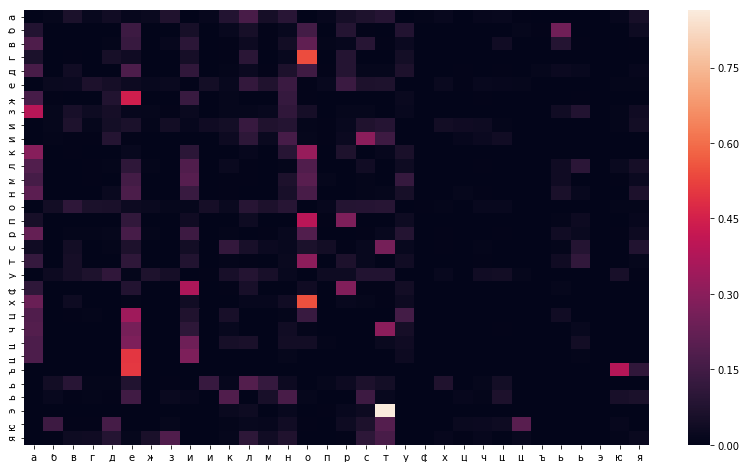

In [25]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Посчитаем вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [26]:
P_start = 1/len(probabilities[0])
probability = {}
for i in Russian:
    for j in Russian:
        prob = P_start * probabilities[POS['п'], POS [i]] * probabilities[POS[i], POS [j]] * \
        probabilities[POS[j], POS ['р']]
        if prob > 0:
            probability.setdefault(''.join(['п', i, j, 'р']), prob)

In [27]:
# Выведем TOP-10 строк по вероятности

dict_ = list(probability.items())
dict_.sort(key=lambda i: i[1], reverse=True)
dict_[:10]

[('прер', 0.00018278080829965275),
 ('прор', 0.0001301905115004464),
 ('прар', 9.551339350430678e-05),
 ('потр', 7.126931737239235e-05),
 ('погр', 6.199973568665526e-05),
 ('подр', 6.063348183849303e-05),
 ('попр', 5.0041522251431185e-05),
 ('поер', 4.597198040839377e-05),
 ('побр', 4.200355237081231e-05),
 ('прур', 2.283039457247405e-05)]

Теперь сгенерируем слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [28]:
s = ['б']
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(Russian), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

будничаво


### 2. Возьмём ряд и оценим его через HMM

In [105]:
data = pd.read_csv('weekly-closings-of-the-dowjones.csv')
series = data['Close']

In [106]:
data

,Week,Close
0,1971-W28,901.80
1,1971-W29,888.51
2,1971-W30,887.78
3,1971-W31,858.43
4,1971-W32,850.61
5,1971-W33,856.02
6,1971-W34,880.91
7,1971-W35,908.15
8,1971-W36,912.75
9,1971-W37,911.00


In [104]:
data.to_csv('weekly-closings-of-the-dowjones.csv', index=False)

In [102]:
data = data[1:]

In [86]:
data.head(19)

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43
5,1971-W32,850.61
6,1971-W33,856.02
7,1971-W34,880.91
8,1971-W35,908.15
9,1971-W36,912.75


In [30]:
from hmmlearn import hmm

In [31]:
values = series.values.reshape(-1,1)

In [57]:
optimal_n = []
for n in range(1, 15):
    model = hmm.GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    optimal_n.append(model.score(values))

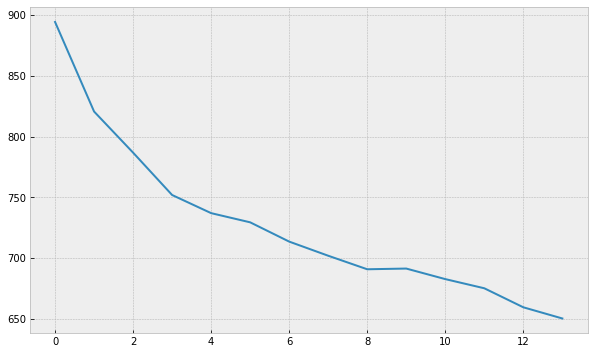

In [58]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10,6))
    plt.plot(optimal_n*np.array([-1]))

Не очень очевидно (где тут "локоть") какое значение лучше подходит, но возьмём 3

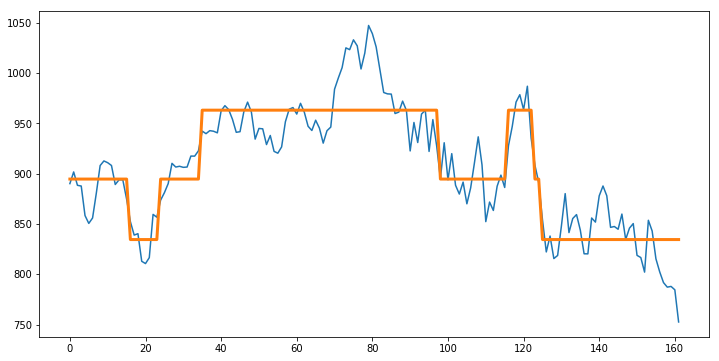

In [59]:
model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [60]:
model.transmat_.shape

(3, 3)

In [69]:
a = labels[-1]
prediction = []
for i in range(20):
    next_val = np.random.choice(3, p=model.transmat_[a])
    prediction.append(model.means_[next_val])

In [70]:
new_series = np.concatenate((values, np.array(prediction)))

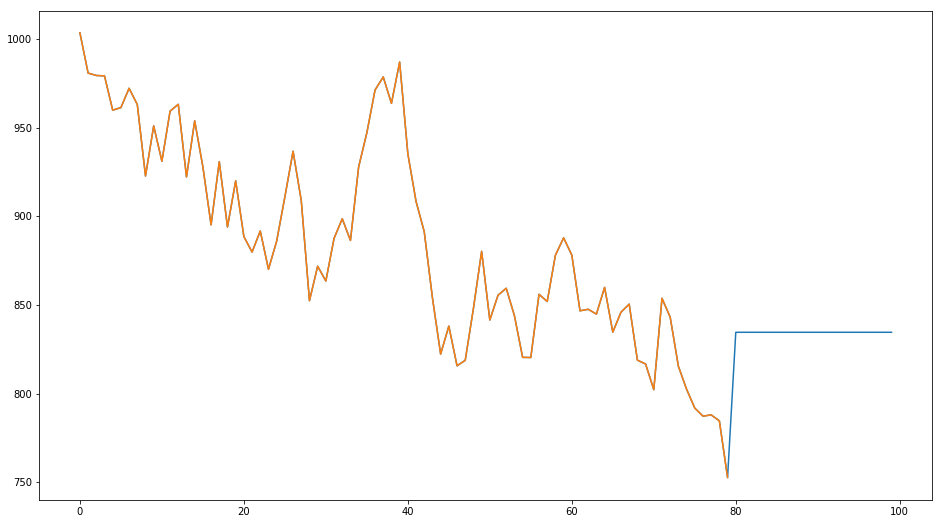

In [71]:
plt.figure(figsize=(16,9))
plt.plot(new_series[-100:])
plt.plot(values[-80:])
plt.show()